In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2.ximgproc
import skimage as ski

<h4>Creating WineRed RGB image</h4>

5 similar Colors:

In [2]:
c1 =  [108,23,63]
c2 =  [120,24,63]
c3 =  [0,23,80]
c4 =  [100,5,0]
c5 =  [90,23,255]
colors = [c1,c2,c3,c4,c5]

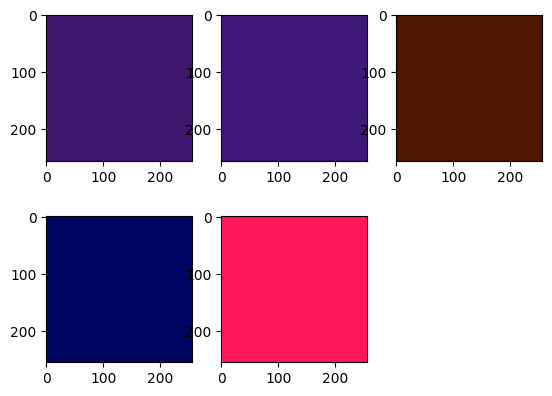

In [3]:
images = []
img = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(0,5):
    img[:,:,:] = colors[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1),plt.imshow(img)
    images.append(img)
    
plt.show()

In [4]:
main_color = [108, 23, 63]
distances = []
for c in colors:
    distance = np.sqrt(np.power(main_color[0]-c[0],2) +
                       np.power(main_color[1]-c[1],2) + np.power(main_color[2]-c[2],2))
    distances.append(distance)


In [5]:
for distance in distances:
    print(distance)

0.0
12.041594578792296
109.32977636490436
66.007575322837
192.84190415985836


<h4>Get R,G,B of Lenna image</h4>

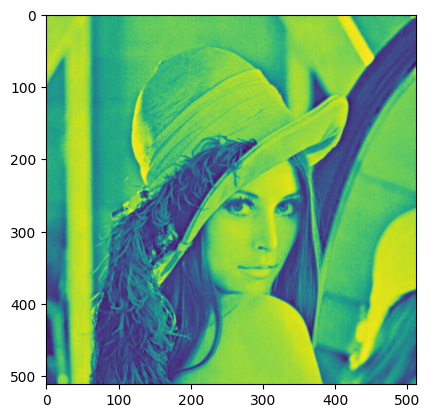

In [24]:
lenna = cv2.imread("lenna.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
#in RGB
#0 = Red
#1 = Green
#2 = Blue
#lenna[line,pixel,(r,g,b)]
plt.imshow(lenna[:,:,0], cmap='viridis')

<h4>Histogram Equalization, Log Adjust, Gamma Adjust</h4>

IMPORTANT: Iwanowska gave us a colored version of a grayscale image, to create the lack in contrast. Adjust log and adjust gamma only work well on grayscale images. Which means that I'd have to convert it to GRAY first. That also means that the lack of contrast is reverted which makes all of this irrelevant. Great

<class 'numpy.ndarray'>


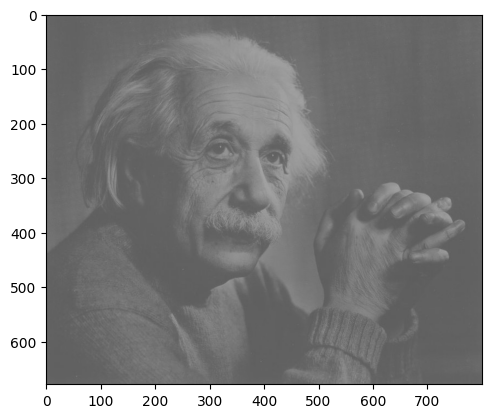

In [63]:
einstein = cv2.imread("einstein.png")
plt.imshow(einstein,cmap='gray')
print(type(einstein))

<h3>Log Adjust</h3>

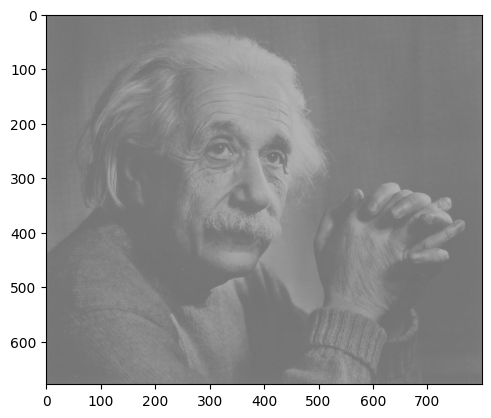

In [44]:
img_log = ski.exposure.adjust_log(einstein, gain=1, inv= False)
plt.imshow(img_log)

<h3>Gamma Adjust</h3>

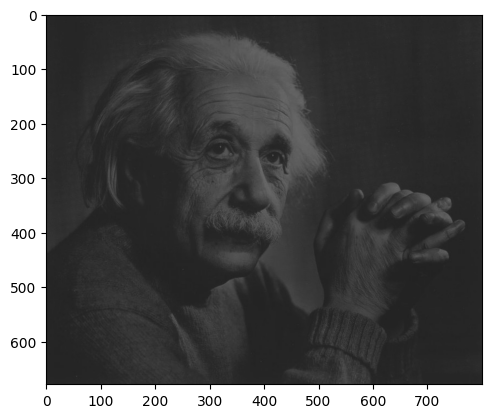

In [52]:
img_gamma = ski.exposure.adjust_gamma(einstein, gamma=2, gain = 1)
plt.imshow(img_gamma)

<h3>Equalize Hist</h3>

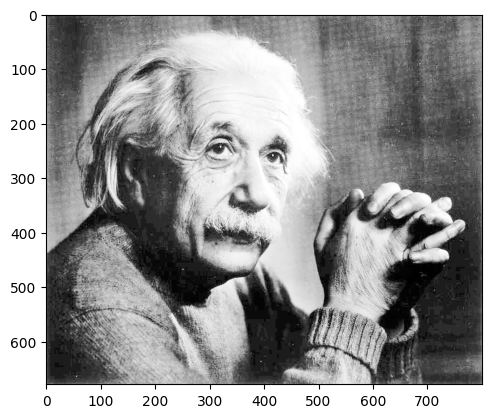

In [56]:
img = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equ = cv2.equalizeHist(img)
plt.imshow(equ,'gray')

<h3>Equalize Hist Adaptively with CLAHE</h3>

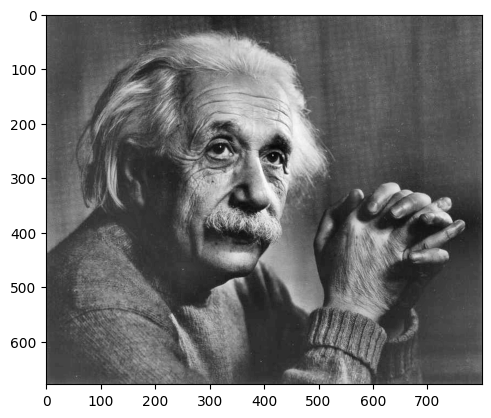

In [58]:
img = cv2.imread('einstein.png',0)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray')